In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

/Users/babou/anaconda/lib/python2.7/site-packages/matplotlib/__init__.py:872: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


In [2]:
## Fonctions to plot

def col_target_q(col, data):
    group_target = data.groupby(['target'])[col].value_counts().reset_index()
    group_target.rename(columns={0:'nbr'}, inplace=True)
    f, ax = plt.subplots(figsize=(15, 4))
    sns.barplot(x=col, y='nbr', hue='target', data=group_target.sort_values(col), hue_order=[0,1])
    
def col_target(col, data):
    group_target = data.groupby(['target'])[col].value_counts()
    state_pcts = group_target.groupby(level=1).apply(lambda x: 100*x/float(x.sum()))
    lol = pd.DataFrame(state_pcts)
    lol.reset_index(inplace=True)
    lol.rename(columns={0:'nbr'}, inplace=True)
    f, ax = plt.subplots(figsize=(15, 4))
    sns.barplot(x=col, y='nbr', hue='target', data=lol.sort_values(col), hue_order=[0,1])

In [151]:
data = pd.read_csv('../data/data.csv', encoding='utf-8')

In [4]:
data.shape

(962, 126)

In [5]:
data.target.value_counts(normalize=True)

1.0    0.878378
0.0    0.121622
Name: target, dtype: float64

## Analyse sur le sexe parrain / filleul

In [6]:
# Parrain
data["H/F"].head()

0    F
1    H
2    F
3    F
4    H
Name: H/F, dtype: object

In [7]:
# Filleul
data["Sexe"].head()

0    F
1    H
2    H
3    F
4    H
Name: Sexe, dtype: object

In [8]:
data["sexe_egal"] = data.apply(lambda row: 1 if row["H/F"] == row["Sexe"] else 0, axis=1)

In [9]:
data.sexe_egal.value_counts()

1    555
0    407
Name: sexe_egal, dtype: int64

/Users/babou/anaconda/lib/python2.7/site-packages/matplotlib/__init__.py:892: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


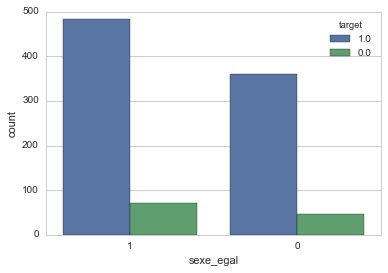

In [10]:
sns.countplot(x='sexe_egal', data=data, hue='target')

## Analyse même ville parrain / filleul (résidence)

Ne pas prendre

In [11]:
# Parrain 
data["Code postal actuel"].head()

0    75010
1    75116
2    93100
3    92400
4    75017
Name: Code postal actuel, dtype: object

In [12]:
# filleul
data["Code postal"].head()

0    51100
1    95260
2    95260
3    69100
4    75010
Name: Code postal, dtype: object

In [13]:
data["code_postal_residence_egal"] = data.apply(lambda row: 1 if row["Code postal actuel"] == row["Code postal"] else 0, axis=1)

In [14]:
data["code_postal_residence_egal"].value_counts()

0    953
1      9
Name: code_postal_residence_egal, dtype: int64

## Analyse même ville parrain / filleul (école)

Ne pas prendre

In [15]:
# filleul
data[u"Code postal de l'établissement actuel"].head()

0    51100
1    95000
2    78351
3    69001
4    75000
Name: Code postal de l'établissement actuel, dtype: object

In [16]:
data["code_postal_residence_egal"] = data.apply(lambda row: 1 if row["Code postal actuel"] == row[u"Code postal de l'établissement actuel"] else 0, axis=1)

In [17]:
data["code_postal_residence_egal"].value_counts()

0    950
1     12
Name: code_postal_residence_egal, dtype: int64

## Analyse Age parrain / filleul

In [18]:
# Parrain :
data["annee_naissance_p"] = pd.to_datetime(data["Date de naissance_p"], errors='coerce').dt.year

In [19]:
# Filleul :
data["annee_naissance_f"] = pd.to_datetime(data["Date de naissance_f"], errors='coerce').dt.year

In [20]:
data["annee_naissance_f"].head()

0    1996
1    1991
2    1993
3    1997
4    1994
Name: annee_naissance_f, dtype: int64

In [21]:
data['diff_annee_naissance'] = data["annee_naissance_f"] - data["annee_naissance_p"]

In [22]:
data['diff_annee_naissance'].describe()

count    779.000000
mean      14.178434
std       10.798231
min      -22.000000
25%        9.000000
50%       12.000000
75%       17.000000
max       92.000000
Name: diff_annee_naissance, dtype: float64

In [23]:
data[["Date de naissance_p", "annee_naissance_f"]][data['diff_annee_naissance'] == -22.0]

,Date de naissance_p,annee_naissance_f
472,2013-11-25 00:00:00,1991


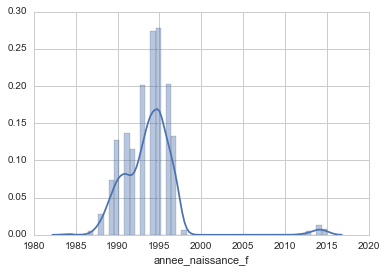

In [24]:
sns.distplot(data.annee_naissance_f)

## Age du Filleul

In [25]:
import datetime

In [26]:
pd.datetime.now().year

2016

In [27]:
today = datetime.date.today()
#data['age_f'] = ((pd.to_datetime(data["Date de naissance_f"], errors='coerce') - pd.datetime.now()) \
#                 / np.timedelta64(1, 'D')).astype(int)

data['age_f'] = pd.datetime.now().year - pd.to_datetime(data["Date de naissance_f"], errors='coerce').dt.year

In [28]:
data['age_f'].head()

0    20
1    25
2    23
3    19
4    22
Name: age_f, dtype: int64

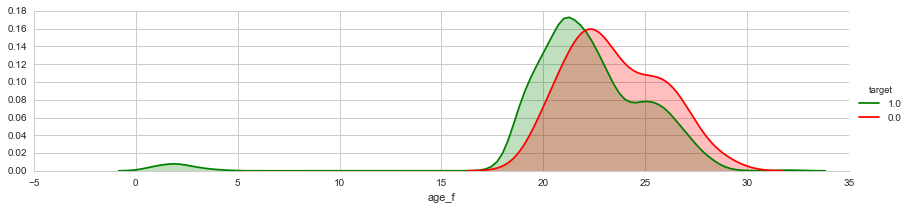

In [29]:
pal = ["g", "r"]
facet = sns.FacetGrid(data, hue="target",aspect=4, palette=pal)
facet.map(sns.kdeplot,'age_f',shade= True)
facet.add_legend()

## Age Parrain

In [30]:
data['age_p'] = pd.datetime.now().year - pd.to_datetime(data["Date de naissance_p"], errors='coerce').dt.year

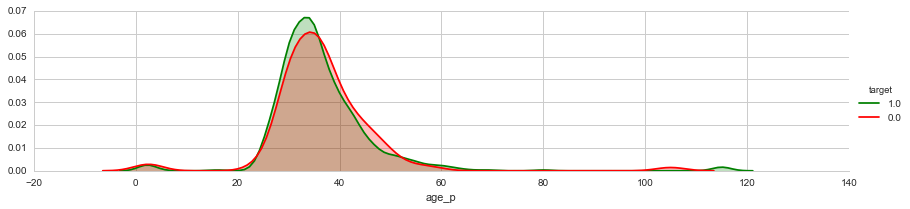

In [31]:
pal = ["g", "r"]
facet = sns.FacetGrid(data, hue="target",aspect=4, palette=pal)
facet.map(sns.kdeplot,'age_p',shade= True)
facet.add_legend()

## Formation filleul

In [32]:
def group_formation(x):
#    try:
    if "ecole" in x.lower():
        return "ecole"
    elif "universit" in x.lower():
        return "universite"
    elif "institut" in x.lower():
        return "institut"
    else:
        return "autre"
#    except:
#        print x

In [33]:
data["group_formation_f"] = data["Formation actuelle"].apply(lambda x: group_formation(x))

In [34]:
data.group_formation_f.value_counts()

ecole         370
universite    282
autre         254
institut       56
Name: group_formation_f, dtype: int64

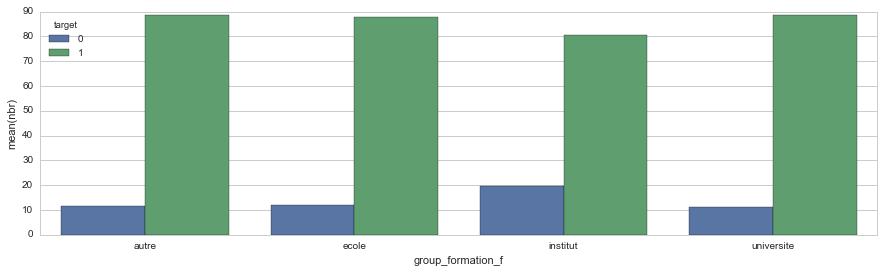

In [35]:
col_target("group_formation_f", data)

## Formation parrain

In [36]:
# Rename col
data.rename(columns={u'Dipl\xf4me Principal':'Diplome Principal'}, inplace=True)

In [37]:


data["group_formation_p"] = data["Diplome Principal"].apply(lambda x: group_formation(x))

In [38]:
data.group_formation_p.value_counts()

ecole         798
universite    162
autre           2
Name: group_formation_p, dtype: int64

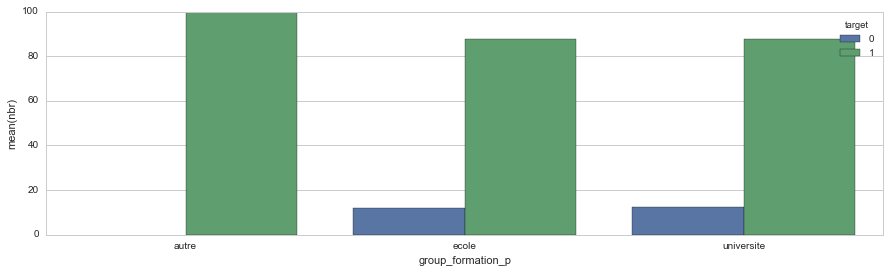

In [39]:
col_target("group_formation_p", data)

## Similitude formation parrain / filleul

In [40]:
data['formation_egal'] = data.apply(lambda row: 1 if row["group_formation_p"] == row["group_formation_f"] else 0, axis=1)

In [41]:
data['formation_egal'].value_counts()

0    497
1    465
Name: formation_egal, dtype: int64

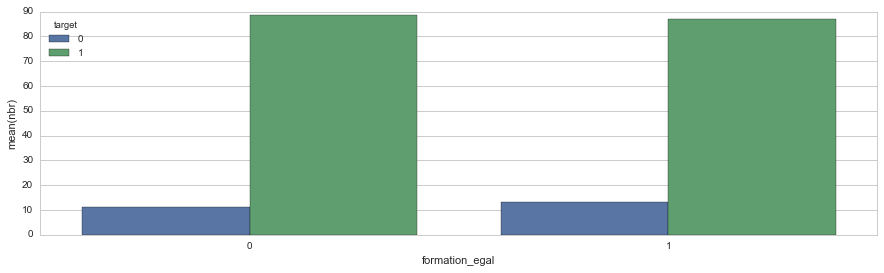

In [42]:
col_target("formation_egal", data)

## Similitude Code Formation parrain / filleul

In [43]:
data["Code formation_p"].value_counts()

3 : Commerce / Finance / Gestion                                                   384
1 : Ingénieurs / Sciences dures                                                    277
4 : Sciences politiques / Droit                                                    165
5 : Sciences humaines et Sociales (anciennement lettres, histoire, philo, arts)     64
2 : Sciences du vivant                                                              44
6 : Autres                                                                          28
Name: Code formation_p, dtype: int64

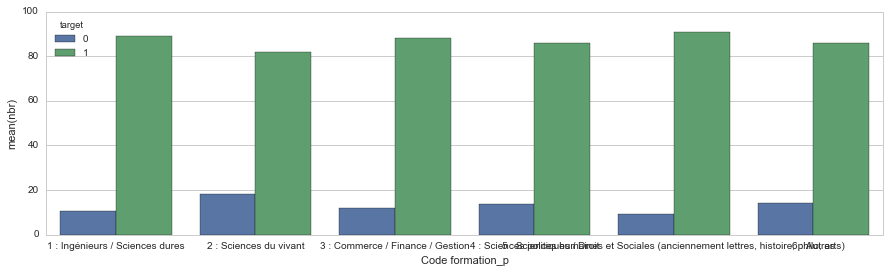

In [44]:
col_target("Code formation_p", data)

In [45]:
data["Code formation_f"].value_counts()

3 : Commerce / Finance / Gestion                                                   370
1 : Ingénieurs / Sciences dures                                                    278
4 : Sciences politiques / Droit                                                    167
5 : Sciences humaines et Sociales (anciennement lettres, histoire, philo, arts)     77
2 : Sciences du vivant                                                              46
6 : Autres                                                                          24
Name: Code formation_f, dtype: int64

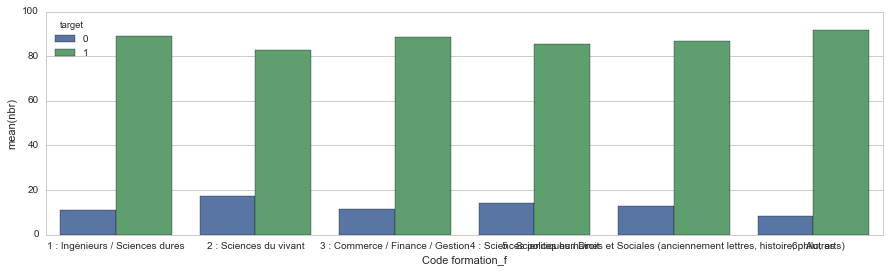

In [46]:
col_target("Code formation_f", data)

In [47]:
data["code_formation_egal"] = data.apply(lambda row: 1 if row["Code formation_f"] == row["Code formation_p"] else 0, axis=1)

In [48]:
data["code_formation_egal"].value_counts()

1    886
0     76
Name: code_formation_egal, dtype: int64

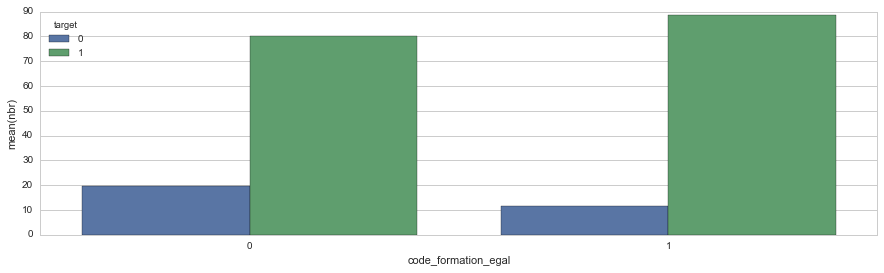

In [49]:
col_target("code_formation_egal", data)

## Analyse projet motivation filleul / activité parrain

In [109]:
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.tokenize import TreebankWordTokenizer



import nltk.stem

In [152]:
stem = nltk.stem.snowball.FrenchStemmer(ignore_stopwords=True)

In [153]:
stop = [word for word in stopwords.words('french')]

In [208]:
def get_similitude_projet_activite(projet, activite):
    """
    projet : motivation du filleul
    activite : activité du parrain
    -----------
    Stem all word in description.
    If match with this stem description (1 word activite in projet) return 1 else 0.
    
    If projet or activite is NaN, return 0
    """
    if projet is np.nan:
        return 0
    if activite is np.nan:
        return 0
    projet_stem = [stem.stem(word) for word in word_tokenize(projet) if word not in stop]
    activite_stem = [stem.stem(word) for word in word_tokenize(activite) if word not in stop]
    
    if len(set(activite_stem).intersection(projet_stem)) >= 1:
        return 1
    else:
        return 0

In [210]:
data["projet_f_activite_p_egal"] = data.apply(lambda row: get_similitude_projet_activite(row["Projet professionnel"],
                                                                                        row[u"Secteur d'activité"]),
                                             axis=1)

In [195]:
data["projet_f_activite_p_egal"].value_counts()

0    765
1    197
Name: projet_f_activite_p_egal, dtype: int64

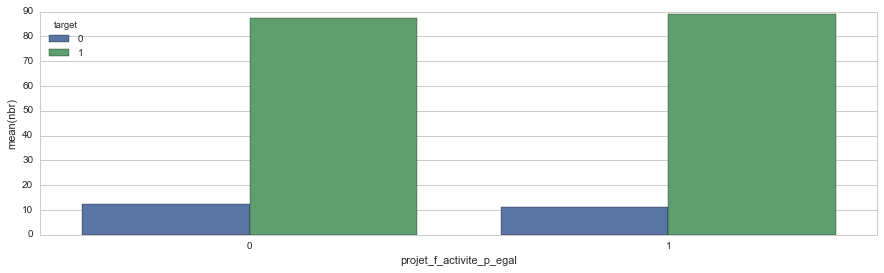

In [196]:
col_target("projet_f_activite_p_egal", data)

## Analyse projet motivation filleul / activité parrain précédente

In [202]:
test = data[u"Fonction précédente"].loc[0]

In [207]:
test is np.nan

True

In [211]:
data["projet_f_activite_pre_p_egal"] = data.apply(lambda row: get_similitude_projet_activite(row["Projet professionnel"],
                                                                                        row[u"Fonction précédente"]),
                                             axis=1)

In [212]:
data["projet_f_activite_pre_p_egal"].value_counts()

0    898
1     64
Name: projet_f_activite_pre_p_egal, dtype: int64

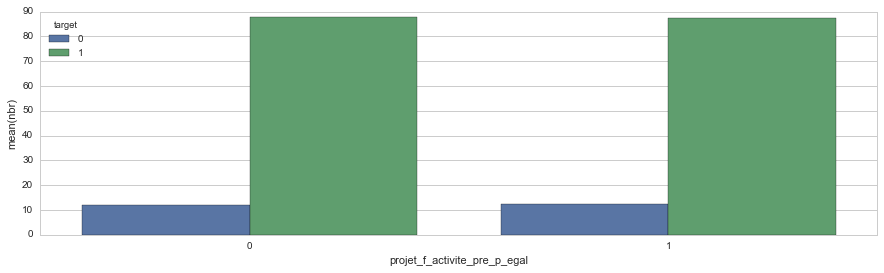

In [213]:
col_target("projet_f_activite_pre_p_egal", data)

## Analyse projet motivation filleul / activité parrain (précédent ou non)

In [220]:
data['projet_f_activite_p_egal_all'] = 0

In [221]:
data.loc[(data["projet_f_activite_p_egal"] == 1) | (data["projet_f_activite_pre_p_egal"] == 1), 'projet_f_activite_p_egal_all'] = 1

In [216]:
data.groupby(["projet_f_activite_pre_p_egal", "projet_f_activite_p_egal"]).size()

projet_f_activite_pre_p_egal  projet_f_activite_p_egal
0                             0                           717
                              1                           181
1                             0                            48
                              1                            16
dtype: int64

In [222]:
data["projet_f_activite_p_egal_all"].value_counts()

0    717
1    245
Name: projet_f_activite_p_egal_all, dtype: int64

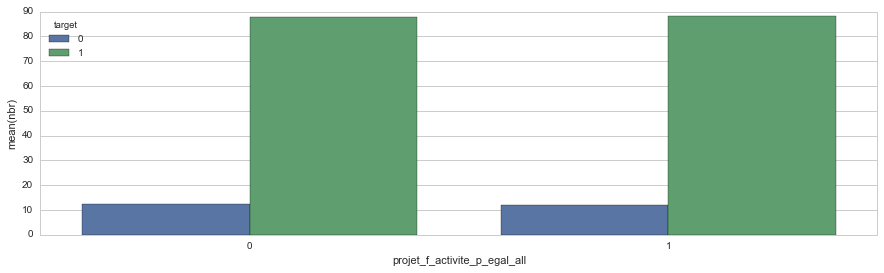

In [223]:
col_target("projet_f_activite_p_egal_all", data)

## Connaissance de Frateli (filleul)

In [227]:
data["Connaissance du programme Frateli"].value_counts()

Autre                                            236
Par un autre filleul                             162
Lors d'une visite de Frateli en terminale        155
Par l'équipe enseignante de mon établissement    106
Par la plaquette CNOUS                            98
Par le bouche à oreille                           85
Lors d'une visite de Frateli en prépa             84
Sur internet                                      36
Name: Connaissance du programme Frateli, dtype: int64

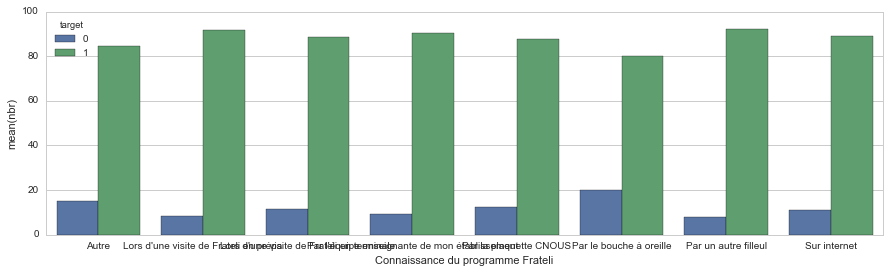

In [228]:
col_target("Connaissance du programme Frateli", data)

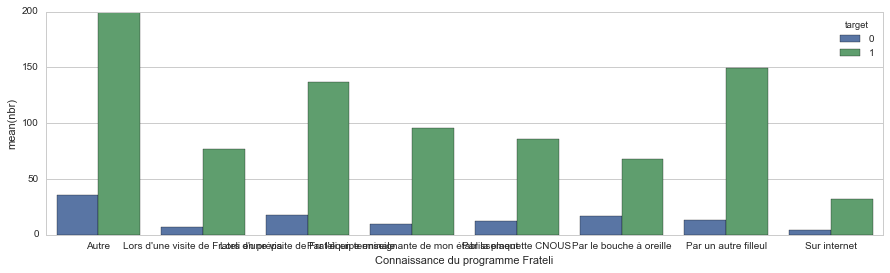

In [229]:
col_target_q("Connaissance du programme Frateli", data)